In [4]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load .csv file into a pandas DataFrame
youtube_content_df = pd.read_csv('youtube_merged_data.csv')
youtube_content_df.head()

,video_id,viewCount,likeCount,commentCount,tags,comment_anger,comment_neutral,comment_sadness,comment_disgust,comment_surprise,...,audio_neutral,audio_sadness,audio_surprise,image_anger,image_disgust,image_fear,image_happiness,image_neutral,image_sadness,image_surprise
0,dhLCzSwUTvc,6518920,165721,8375,"full face of flawless, flawless, flawless make...",23.785000,36.298929,10.438750,3.100000,6.790000,...,38.03,13.68,11.47,2.68,2.77,6.21,16.65,42.84,15.26,13.62
1,9rUCHq0IeK4,880140,32204,644,"james, james charles, makeup artist, mua, cute...",10.097143,48.231351,15.194000,9.822857,23.688571,...,25.63,5.09,13.47,9.08,4.82,17.44,7.42,35.77,6.87,19.88
2,Q7KdkCYto-c,2633899,50321,3001,"college, reaction, mit, harvard",15.551364,54.870244,33.400667,8.778000,14.466667,...,8.28,33.81,34.65,7.29,19.78,39.83,6.38,5.20,1.95,19.56
3,1Sq3_s7XEtU,160689,5674,302,NaN,9.938696,36.879189,28.886429,49.075000,17.537333,...,21.55,15.85,3.67,25.64,4.97,50.68,0.16,8.69,1.21,8.65
4,IFj4v7niPRI,128241,2502,135,"college, college decisions, college decisions ...",12.133529,40.393696,1.885000,7.100000,21.454643,...,13.95,0.89,11.33,4.04,17.16,36.43,14.76,6.21,3.01,18.40


In [7]:
# To find correlation between numerical columns, drop non-numerical columns
numerical_df = youtube_content_df.drop(['video_id'], axis=1)
numerical_df.corr()

In [ ]:
# Load all_audios_emotion.csv into a pandas DataFrame
all_audios_emotion_df = pd.read_csv('all_audios_emotion.csv')

# Load all_imgs_emotion.csv into a pandas DataFrame
all_imgs_emotion_df = pd.read_csv('all_imgs_emotion.csv')

# Load all_texts_emotion.csv into a pandas DataFrame
all_texts_emotion_df = pd.read_csv('all_texts_emotion.csv')

In [ ]:
# Merge all DataFrames into one DataFrame
youtube_emotion_df = pd.merge(all_audios_emotion_df, all_imgs_emotion_df, on='video_id')

In [ ]:
genres = ["Reaction", "Movie Shorts", "Vlog", "Tutorial"]
sections = ["0-20", "20-40", "40-60", "60-80", "80-100"]
emotion_labels = ["Anger", "Fear", "Disgust", "Sadness", "Neutral", "Happiness", "Surprise"]

# Extract wanted genres and calculate the mean of each section
youtube_emotion_genres = youtube_emotion_df[youtube_emotion_df['genre'].isin(genres)]
youtube_emotion_genres['mean'] = youtube_emotion_genres[sections].mean(axis=1)
youtube_emotion_genres = youtube_emotion_genres.groupby('genre').mean().reset_index()

# Separate each section of the video
youtube_emotion_genres = pd.melt(youtube_emotion_genres, id_vars=['genre'], value_vars=sections, var_name='section', value_name='emotion')
youtube_emotion_genres['emotion'] = youtube_emotion_genres['emotion'].apply(lambda x: round(x, 2))
youtube_emotion_genres = youtube_emotion_genres[youtube_emotion_genres['section'].isin(emotion_labels)]


time_emotion = {}
for genre in genres:
    temp_dict = {}
    for emotion in emotion_labels:
        temp_dict[emotion] = youtube_emotion_genres[(youtube_emotion_genres['genre'] == genre) & (youtube_emotion_genres['section'] == emotion)]['emotion'].values[0]
    time_emotion[genre] = temp_dict

In [ ]:
youtube_emotion_df

In [9]:
print(time_emotion)

{'Reaction': {'Anger': [2.35, 4.53, 5.14, 2.25, 5.31], 'Fear': [5.54, 10.22, 8.09, 11.39, 5.94], 'Disgust': [3.84, 5.56, 4.92, 7.61, 6.44], 'Sadness': [5.4, 7.72, 13.53, 4.16, 9.14], 'Neutral': [59.39, 26.15, 23.92, 25.13, 40.29], 'Happiness': [13.06, 21.55, 25.04, 17.43, 27.55], 'Surprise': [10.42, 24.27, 19.36, 32.05, 5.33]}, 'Movie Shorts': {'Anger': [16.93, 17.21, 16.24, 15.37, 13.22], 'Fear': [18.16, 19.24, 21.2, 18.65, 18.33], 'Disgust': [14.3, 14.02, 10.09, 16.31, 11.03], 'Sadness': [8.91, 9.04, 14.83, 14.04, 19.03], 'Neutral': [18.26, 10.25, 14.06, 6.19, 14.8], 'Happiness': [10.3, 18.21, 13.53, 18.05, 13.1], 'Surprise': [13.14, 11.03, 10.05, 11.39, 10.49]}, 'Vlog': {'Anger': [9.23, 10.13, 11.94, 11.49, 10.11], 'Fear': [9.19, 8.19, 10.13, 10.55, 9.3], 'Disgust': [10.3, 8.2, 11.39, 9.49, 9.5], 'Sadness': [11.39, 14.28, 12.05, 10.54, 11.4], 'Neutral': [10.71, 21.57, 20.25, 25.3, 28.43], 'Happiness': [27.18, 25.59, 23.3, 23.04, 22.34], 'Surprise': [19.3, 12.04, 10.94, 8.59, 8.92]},

In [10]:
print("Genres:")
for genre in time_emotion:
    print(genre)
    for emotion in time_emotion[genre]:
        print(emotion)
        print(time_emotion[genre][emotion])
        print("Mean: ", np.mean(time_emotion[genre][emotion]))
        print("Median: ", np.median(time_emotion[genre][emotion]))
        print("Standard Deviation: ", np.std(time_emotion[genre][emotion]))
        print("Variance: ", np.var(time_emotion[genre][emotion]))

Genres:
Reaction
Anger
[2.35, 4.53, 5.14, 2.25, 5.31]
Mean:  3.9159999999999995
Median:  4.53
Standard Deviation:  1.3450888446493041
Variance:  1.8092639999999995
Fear
[5.54, 10.22, 8.09, 11.39, 5.94]
Mean:  8.236
Median:  8.09
Standard Deviation:  2.299796512737595
Variance:  5.2890640000000015
Disgust
[3.84, 5.56, 4.92, 7.61, 6.44]
Mean:  5.674
Median:  5.56
Standard Deviation:  1.2868504186578953
Variance:  1.6559840000000006
Sadness
[5.4, 7.72, 13.53, 4.16, 9.14]
Mean:  7.99
Median:  7.72
Standard Deviation:  3.2699847094443726
Variance:  10.692799999999998
Neutral
[59.39, 26.15, 23.92, 25.13, 40.29]
Mean:  34.976
Median:  26.15
Standard Deviation:  13.574675834066904
Variance:  184.27182399999998
Happiness
[13.06, 21.55, 25.04, 17.43, 27.55]
Mean:  20.926
Median:  21.55
Standard Deviation:  5.201686649539743
Variance:  27.057544
Surprise
[10.42, 24.27, 19.36, 32.05, 5.33]
Mean:  18.285999999999998
Median:  19.36
Standard Deviation:  9.551348805273525
Variance:  91.22826399999998


In [2]:

plt.rcParams.update({
   'text.color': "white",
   'axes.labelcolor': "white",
   'axes.edgecolor': 'white',
   'xtick.color': "white",
   'ytick.color': "white",
   'legend.edgecolor': 'white',
   'legend.facecolor': 'none',
})


In [ ]:
genre_labels = ["Reaction", "Movie Shorts", "Vlog", "Tutorial"]
emotion_labels = ["Anger", "Fear", "Disgust", "Sadness", "Neutral", "Happiness", "Surprise"]
sections = ["0-20", "20-40", "40-60", "60-80", "80-100"]
colors = ["#DD413C", "#CF8A3F", "#A43FCF", "#3FC1CF", "#878582", "#3FCF55", "#CFCF3F"]

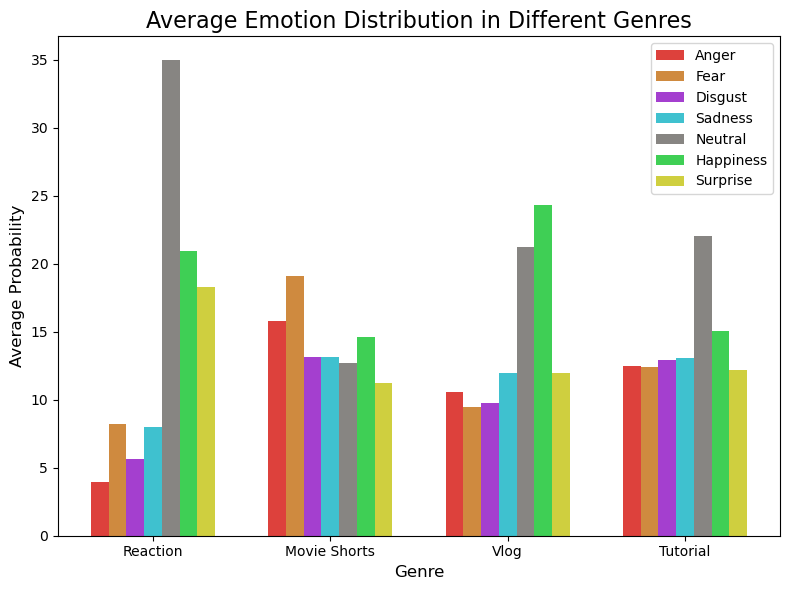

In [4]:
emotion_percentages = {}

for genre in genre_labels:
    emotion_percentages[genre] = {}
    for emotion in emotion_labels:
        emotion_percentages[genre][emotion] = sum(time_emotion[genre][emotion]) / len(time_emotion[genre][emotion])


plt.rcParams["figure.figsize"] = (8, 6)

plt.figure()
plt.title("Average Emotion Distribution in Different Genres", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Average Probability", fontsize=12)
x = np.arange(len(genre_labels))
width = 0.1
for i, emotion in enumerate(emotion_labels):
    y = [emotion_percentages[genre][emotion] for genre in genre_labels]
    plt.bar(x + i * width, y, width=width, label=emotion, color=colors[i])
plt.xticks(x + width * 3, genre_labels, fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.tight_layout()
plt.savefig(f"genre-emotion-distribution.png", transparent=True)
plt.show()

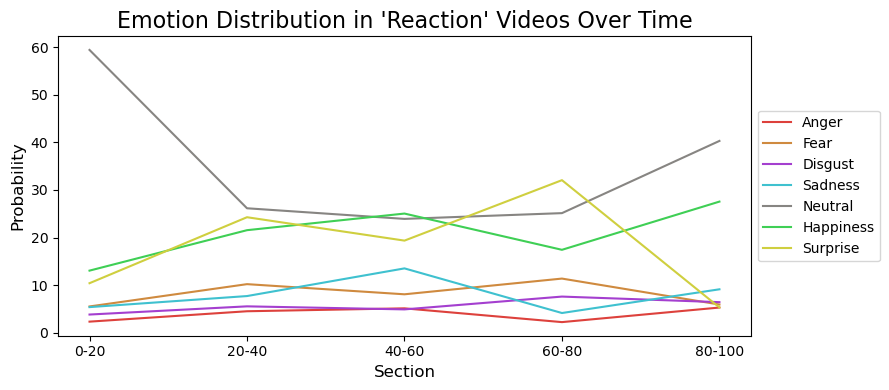

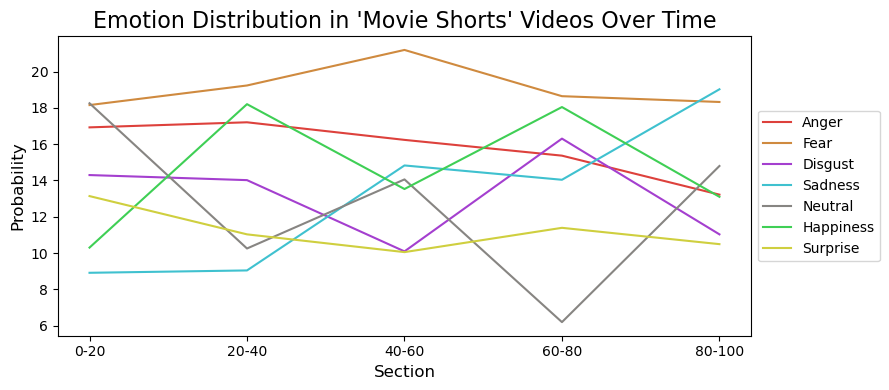

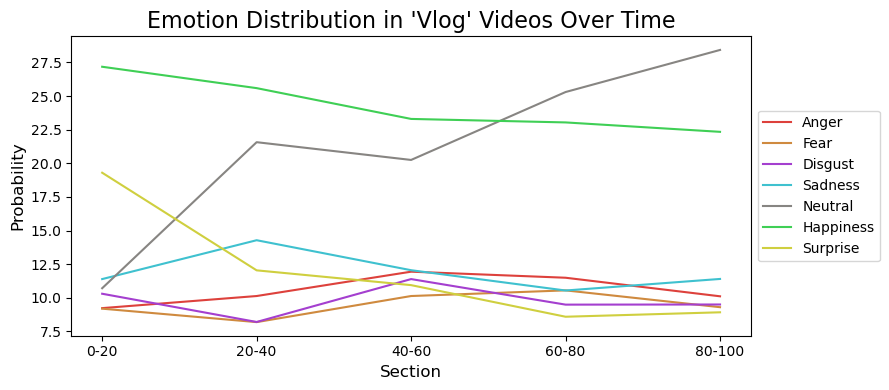

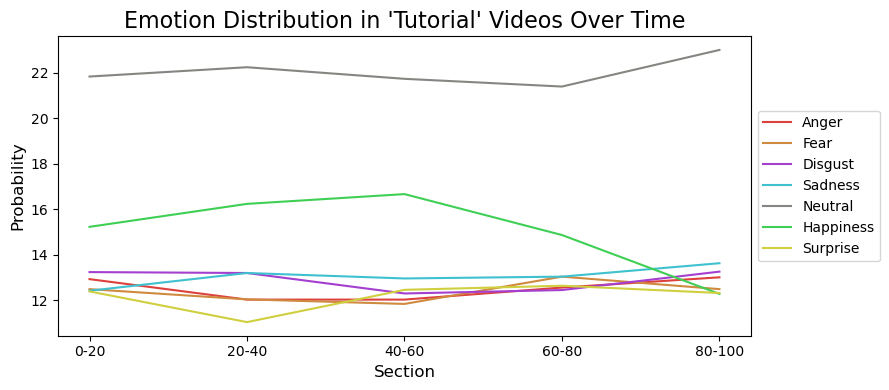

In [6]:

for i, genre in enumerate(genre_labels):
    # plot line graph
    plt.rcParams["figure.figsize"] = (9, 4) # 30 by 20
    plt.figure()
    plt.title(f"Emotion Distribution in '{genre}' Videos Over Time", fontsize=16)
    plt.xlabel("Section", fontsize=12)
    plt.ylabel("Probability", fontsize=12)
    x = list(np.arange(len(sections)))
    for j, emotion in enumerate(emotion_labels):
        y = time_emotion[genre][emotion]
        plt.plot(x, y, label=emotion, color=colors[j])
    plt.xticks(x, sections, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig(f"genre-time-{genre}.png", transparent=True)
    plt.show()
